# **Notebook: Métricas para evaluar modelos (con datos simulados)**

Este notebook muestra cómo evaluar modelos en **regresión** y **clasificación**, usando datos sintéticos.
Incluye: split train/test, baseline, métricas principales y gráficos (ROC/PR, residuales, etc.).

> Requisitos: numpy, pandas, matplotlib, scikit-learn

# Métricas para evaluar modelos en Machine Learning

Evaluar un modelo en Machine Learning significa cuantificar **qué tan bien generaliza** a datos nuevos y **qué tipo de errores comete**. Las métricas dependen del tipo de problema (regresión, clasificación, clustering, ranking, etc.) y del objetivo real (costos, riesgo, equidad, calibración). En general, no existe una “mejor métrica universal”: la métrica correcta debe alinearse con **lo que importa en el caso de uso**.

---

## 1) Métricas para **Regresión** (salida continua)

Estas métricas comparan valores reales $y$ vs predicciones $\hat{y}$.

### Errores en escala original
- **MAE (Mean Absolute Error)**  
  Promedio del error absoluto:  
  $$
  \text{MAE}=\frac{1}{n}\sum |y_i-\hat{y}_i|
  $$  
  *Interpretación*: “en promedio me equivoco en X unidades”.

- **RMSE (Root Mean Squared Error)**  
  Raíz del MSE; penaliza más los errores grandes:  
  $$
  \text{RMSE}=\sqrt{\frac{1}{n}\sum (y_i-\hat{y}_i)^2}
  $$  
  *Útil* cuando errores grandes son especialmente costosos.

- **MSE (Mean Squared Error)**  
  Similar a RMSE pero en unidades cuadradas; útil para optimización.

### Métricas relativas y de ajuste
- **$R^2$ (Coeficiente de determinación)**  
  Proporción de varianza explicada por el modelo:  
  $$
  R^2 = 1 - \frac{\sum (y_i-\hat{y}_i)^2}{\sum (y_i-\bar{y})^2}
  $$  
  *Ojo*: puede ser engañoso fuera del dominio de entrenamiento o si hay sesgos sistemáticos.

- **MAPE (Mean Absolute Percentage Error)**  
  Error porcentual medio absoluto:  
  $$
  \text{MAPE}=\frac{100}{n}\sum \left|\frac{y_i-\hat{y}_i}{y_i}\right|
  $$  
  *Ojo*: falla si $y_i$ puede ser 0 o muy pequeño.

### Robustas a outliers
- **MedAE (Median Absolute Error)**  
  Mediana de $|y-\hat{y}|$; menos sensible a outliers.

---

## 2) Métricas para **Clasificación** (salida discreta)

En clasificación hay dos niveles:
1) **Etiquetas predichas** $\hat{y}$ (depende de un umbral si es binaria).
2) **Scores/probabilidades** $\hat{p}$ (ranking y calibración).

### Métricas basadas en la matriz de confusión (binaria)
Con:
- **TP**: verdaderos positivos, **FP**: falsos positivos  
- **TN**: verdaderos negativos, **FN**: falsos negativos

- **Accuracy**  
  $$
  \frac{TP+TN}{TP+TN+FP+FN}
  $$  
  *Útil* si las clases están balanceadas; *peligrosa* con desbalance.

- **Precision** (qué tan “limpios” son los positivos detectados)  
  $$
  \text{Prec}=\frac{TP}{TP+FP}
  $$

- **Recall / Sensitivity / TPR** (cuántos positivos capturo)  
  $$
  \text{Rec}=\frac{TP}{TP+FN}
  $$

- **Specificity / TNR** (cuántos negativos rechazo bien)  
  $$
  \text{Spec}=\frac{TN}{TN+FP}
  $$

- **F1-score** (balance entre precision y recall)  
  $$
  F1 = 2\frac{\text{Prec}\cdot \text{Rec}}{\text{Prec}+\text{Rec}}
  $$  
  (También existen **F$_\beta$** para ponderar más recall o precision.)

- **Balanced Accuracy**  
  Promedio de TPR y TNR; útil con desbalance.

### Métricas basadas en probabilidades (ranking)
- **ROC-AUC**  
  Área bajo la curva ROC; mide capacidad de ranking entre clases.  
  *Ojo*: con clases muy raras puede verse “optimista”.

- **PR-AUC / Average Precision**  
  Área bajo precision–recall; suele ser más informativa cuando la clase positiva es rara.

- **Log Loss (Cross-Entropy)**  
  Penaliza probabilidades mal calibradas: si el modelo está “muy seguro” y se equivoca, castiga mucho.

### Multiclase
- Se usan versiones **macro**, **micro** y **weighted** de precision/recall/F1.
- **Top-k accuracy** (muy común en visión/NLP).

---

## 3) Métricas de **Calibración** (cuando importan probabilidades “bien dichas”)

No basta con clasificar bien; a veces importa que “0.8” signifique realmente 80%:

- **Brier Score** (binaria): error cuadrático de probabilidades.  
- **Calibration curve / Reliability diagram**: diagnóstico visual.
- (Relacionado) **Expected Calibration Error (ECE)**: resumen de descalibración.

---

## 4) Métricas para **Clustering / No supervisado** (si no hay etiquetas)

- **Silhouette score**: cohesión vs separación.
- **Davies–Bouldin index**, **Calinski–Harabasz**: criterios internos.
- Con etiquetas externas: **ARI** (Adjusted Rand Index), **NMI** (Normalized Mutual Information).

---

## 5) ¿Cómo escoger una métrica? (regla práctica)

- Si el error se mide en unidades reales → **MAE/RMSE** (regresión).
- Si hay desbalance o costos asimétricos → **precision/recall/F1, PR-AUC** (clasificación).
- Si importan probabilidades confiables → **log loss + calibración**.
- Si el costo de errores es explícito → define una **métrica de costo** o una utilidad esperada.

---

## 6) Buenas prácticas mínimas

- Reportar métricas en **test** o con **cross-validation** (no solo training).
- Comparar contra un **baseline**.
- Acompañar métricas con al menos un gráfico diagnóstico:
  - regresión: residuales, predicho vs real
  - clasificación: matriz de confusión, ROC/PR, curva de calibración
- Evitar **data leakage**: una mala evaluación “infla” métricas y da falsa confianza.


In [ ]:
def MyMAE (a,b):
    a=np.asarray(a)
    b=np.asarray(b)
    MAE=np.mean(np.abs(a-b))
    return

In [ ]:
# =========================================================
# Simulación + evaluación de métricas (Regresión y Clasificación)
# =========================================================
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression, make_classification
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, median_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score,
    roc_auc_score, average_precision_score, log_loss, brier_score_loss, confusion_matrix
)
from sklearn.linear_model import LinearRegression, LogisticRegression

np.random.seed(7)

# ---------------------------------------------------------
# Helpers: métricas de regresión y clasificación
# ---------------------------------------------------------
def regression_metrics(y_true, y_pred, eps=1e-12):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)


    mymae = MyMAE(y_true, y_pred)
    mae  = mean_absolute_error(y_true, y_pred)
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)

    # MAPE (cuidado con ceros)
    denom = np.maximum(np.abs(y_true), eps)
    mape = np.mean(np.abs((y_true - y_pred) / denom)) * 100.0

    return {
        "MAE": mae,
        "MyME":mymae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2,
        "MedAE": medae,
        "MAPE(%)": mape,
    }

def classification_metrics(y_true, y_proba, threshold=0.5):
    y_true = np.asarray(y_true).astype(int)
    y_proba = np.asarray(y_proba)
    y_pred = (y_proba >= threshold).astype(int)

    # métricas por etiquetas
    acc = accuracy_score(y_true, y_pred)
    bacc = balanced_accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    # métricas por probabilidades / ranking
    roc = roc_auc_score(y_true, y_proba)
    pr  = average_precision_score(y_true, y_proba)
    ll  = log_loss(y_true, np.c_[1 - y_proba, y_proba])  # requiere probas para ambas clases
    brier = brier_score_loss(y_true, y_proba)

    cm = confusion_matrix(y_true, y_pred)  # [[TN, FP],[FN, TP]]

    return {
        "threshold": threshold,
        "Accuracy": acc,
        "BalancedAcc": bacc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "ROC_AUC": roc,
        "PR_AUC(AP)": pr,
        "LogLoss": ll,
        "Brier": brier,
        "ConfusionMatrix": cm
    }

In [ ]:
# =========================================================
# A) SIMULACIÓN + MÉTRICAS: REGRESIÓN
# =========================================================
Xr, yr = make_regression(
    n_samples=400,
    n_features=6,
    n_informative=4,
    noise=25.0,
    bias=50.0,
    random_state=7
)

Xr_tr, Xr_te, yr_tr, yr_te = train_test_split(Xr, yr, test_size=0.30, random_state=7)

# Baseline: predecir la media del train
yr_hat_base = np.full_like(yr_te, yr_tr.mean(), dtype=float)

# Modelo: Linear Regression
reg = LinearRegression()
reg.fit(Xr_tr, yr_tr)
yr_hat = reg.predict(Xr_te)

reg_tbl = pd.DataFrame([
    {"Model": "Baseline(mean)", **regression_metrics(yr_te, yr_hat_base)},
    {"Model": "LinearRegression", **regression_metrics(yr_te, yr_hat)}
]).set_index("Model")

print("\n=== REGRESIÓN: métricas en TEST ===")
display(reg_tbl)

In [ ]:
# =========================================================
# B) SIMULACIÓN + MÉTRICAS: CLASIFICACIÓN (binaria)
# =========================================================
Xc, yc = make_classification(
    n_samples=1200,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    weights=[0.75, 0.25],  # desbalance: 25% positivos
    class_sep=1.2,
    flip_y=0.03,
    random_state=7
)

Xc_tr, Xc_te, yc_tr, yc_te = train_test_split(Xc, yc, test_size=0.30, random_state=7, stratify=yc)

# Baseline: probabilidad constante = prevalencia en train
p_base = np.full_like(yc_te, yc_tr.mean(), dtype=float)

# Modelo: Logistic Regression
clf = LogisticRegression(max_iter=5000)
clf.fit(Xc_tr, yc_tr)
p_hat = clf.predict_proba(Xc_te)[:, 1]

# Métricas con umbral 0.5
m_base = classification_metrics(yc_te, p_base, threshold=0.5)
m_log  = classification_metrics(yc_te, p_hat,  threshold=0.5)

# Tabla resumida (sin la matriz de confusión, la mostramos aparte)
clf_tbl = pd.DataFrame([
    {k: v for k, v in m_base.items() if k != "ConfusionMatrix"},
    {k: v for k, v in m_log.items()  if k != "ConfusionMatrix"},
], index=["Baseline(prevalence)", "LogisticRegression"])

print("\n=== CLASIFICACIÓN: métricas en TEST (thr=0.5) ===")
display(clf_tbl)

print("\nMatriz de confusión — Baseline(prevalence) (thr=0.5):")
print(m_base["ConfusionMatrix"])

print("\nMatriz de confusión — LogisticRegression (thr=0.5):")
print(m_log["ConfusionMatrix"])

In [ ]:
# =========================================================
# C) BONUS: ver cómo cambian Precision/Recall con el umbral
# =========================================================
thresholds = np.linspace(0.1, 0.9, 17)
rows = []
for t in thresholds:
    mm = classification_metrics(yc_te, p_hat, threshold=float(t))
    rows.append({k: v for k, v in mm.items() if k not in ["ConfusionMatrix"]})

thr_df = pd.DataFrame(rows)
print("\n=== LogisticRegression: métricas vs umbral (primeras filas) ===")
display(thr_df.head())

In [ ]:
# =========================================================
# D) CLASIFICACIÓN MULTICLASE + MATRIZ DE CONFUSIÓN (con gráfico)
# =========================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    log_loss, confusion_matrix, classification_report
)

# 1) Simular datos multiclase
Xmc, ymc = make_classification(
    n_samples=1500,
    n_features=12,
    n_informative=6,
    n_redundant=2,
    n_classes=3,
    n_clusters_per_class=1,
    class_sep=1.2,
    flip_y=0.03,
    random_state=7
)

classes = np.unique(ymc)
class_names = [f"Clase {c}" for c in classes]

Xtr, Xte, ytr, yte = train_test_split(
    Xmc, ymc, test_size=0.30, random_state=7, stratify=ymc
)

# 2) Baseline: predecir siempre la clase mayoritaria
major = pd.Series(ytr).value_counts().idxmax()
pred_base = np.full_like(yte, fill_value=major)

# Probas baseline = prior del train
priors = pd.Series(ytr).value_counts(normalize=True).sort_index()
proba_base = np.tile(priors.values, (len(yte), 1))

# 3) Modelo: Logistic Regression multiclase (multinomial)
clf_mc = LogisticRegression(
    max_iter=5000,
    solver="lbfgs",
    # multi_class="multinomial"
)
clf_mc.fit(Xtr, ytr)

pred_mc = clf_mc.predict(Xte)
proba_mc = clf_mc.predict_proba(Xte)

# 4) Métricas (multiclase)
def multiclass_metrics(name, y_true, y_pred, y_proba):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "BalancedAcc": balanced_accuracy_score(y_true, y_pred),
        "F1_macro": f1_score(y_true, y_pred, average="macro"),
        "F1_weighted": f1_score(y_true, y_pred, average="weighted"),
        "LogLoss": log_loss(y_true, y_proba, labels=classes),
    }

tbl_mc = pd.DataFrame([
    multiclass_metrics("Baseline (major class)", yte, pred_base, proba_base),
    multiclass_metrics("LogisticRegression (multiclass)", yte, pred_mc, proba_mc),
]).set_index("Model")

print("=== MULTICLASE: métricas en TEST ===")
display(tbl_mc)

print("\n=== Reporte detallado (LogisticRegression) ===")
print(classification_report(yte, pred_mc, target_names=class_names, digits=3))

# 5) Matriz de confusión + gráfico (conteos y normalizada)
cm = confusion_matrix(yte, pred_mc, labels=classes)
cm_norm = cm / cm.sum(axis=1, keepdims=True)

def plot_confusion(cm_show, title, fmt="{:d}", cmap=None):
    plt.figure(figsize=(6,5))
    plt.imshow(cm_show, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.xticks(range(len(classes)), class_names, rotation=30, ha="right")
    plt.yticks(range(len(classes)), class_names)

    # anotaciones
    for i in range(cm_show.shape[0]):
        for j in range(cm_show.shape[1]):
            val = cm_show[i, j]
            plt.text(j, i, fmt.format(val), ha="center", va="center")

    plt.ylabel("Real")
    plt.xlabel("Predicho")
    plt.tight_layout()
    plt.show()

# Conteos
plot_confusion(cm, "Matriz de confusión (conteos)", fmt="{:d}")

# Normalizada (por fila)
plot_confusion(cm_norm, "Matriz de confusión (normalizada por clase real)", fmt="{:.2f}")


In [3]:
import numpy as np
x=np.arange(-30,30,0.5)

In [4]:
x

array([-30. , -29.5, -29. , -28.5, -28. , -27.5, -27. , -26.5, -26. ,
       -25.5, -25. , -24.5, -24. , -23.5, -23. , -22.5, -22. , -21.5,
       -21. , -20.5, -20. , -19.5, -19. , -18.5, -18. , -17.5, -17. ,
       -16.5, -16. , -15.5, -15. , -14.5, -14. , -13.5, -13. , -12.5,
       -12. , -11.5, -11. , -10.5, -10. ,  -9.5,  -9. ,  -8.5,  -8. ,
        -7.5,  -7. ,  -6.5,  -6. ,  -5.5,  -5. ,  -4.5,  -4. ,  -3.5,
        -3. ,  -2.5,  -2. ,  -1.5,  -1. ,  -0.5,   0. ,   0.5,   1. ,
         1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,   5. ,   5.5,
         6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,   9.5,  10. ,
        10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,  14. ,  14.5,
        15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,  18.5,  19. ,
        19.5,  20. ,  20.5,  21. ,  21.5,  22. ,  22.5,  23. ,  23.5,
        24. ,  24.5,  25. ,  25.5,  26. ,  26.5,  27. ,  27.5,  28. ,
        28.5,  29. ,  29.5])

In [6]:
y1=4*x+6
ruido=np.random.rand(len(x))
y1=y1+ruido

In [7]:
y1

array([-113.49561604, -111.98619834, -109.28339008, -107.92945989,
       -105.95672063, -103.91915138, -101.45407191,  -99.49984376,
        -97.5056019 ,  -95.08930291,  -93.79908044,  -91.55309726,
        -89.94761389,  -87.26981008,  -85.18623163,  -83.70739053,
        -81.91001028,  -79.64562531,  -77.63336787,  -75.27696278,
        -73.4547308 ,  -71.4385693 ,  -69.38542452,  -67.23548447,
        -65.52502735,  -63.72471256,  -61.91350528,  -59.19939877,
        -57.90182306,  -55.12902494,  -53.68688618,  -51.21981437,
        -49.72453573,  -47.15820547,  -45.23180512,  -43.83262617,
        -41.35755623,  -39.76795723,  -37.00684949,  -35.49130436,
        -33.00789629,  -31.77423925,  -29.27752626,  -27.10258018,
        -25.67825297,  -23.40904182,  -21.26289901,  -19.3604091 ,
        -17.03880061,  -15.83591785,  -13.29703987,  -11.81878875,
         -9.42888621,   -7.94414493,   -5.8453031 ,   -3.49733239,
         -1.86377001,    0.43567618,    2.80476162,    4.39399

In [14]:
import matplotlib.pyplot as plt

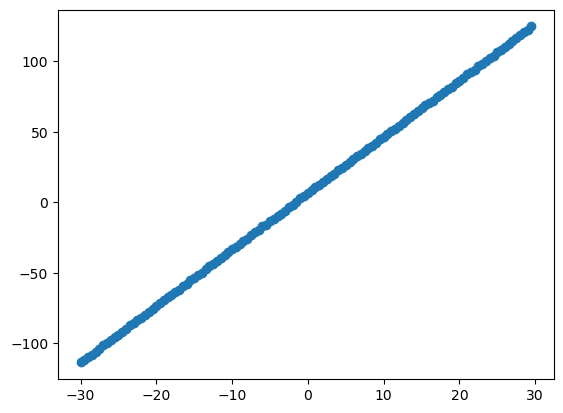

In [17]:
plt.scatter(x,y1, marker="o")